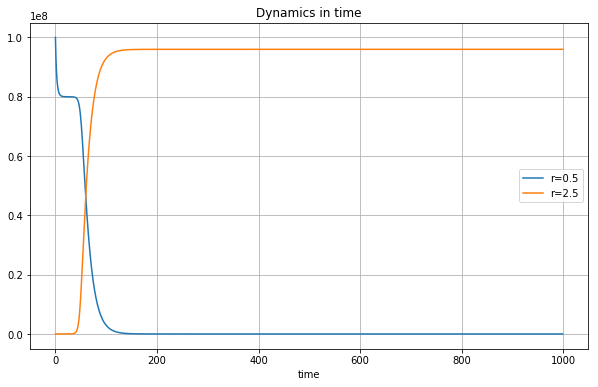

In [6]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate

# threshold = 5 #Mutation threshold
k = 10**8 #Carrying capacity
# p = 10**-8 #Mutation rate
r_inc = 0.5
r = np.array([0.5, 2.5])
d = 0.1

# define the system in numpy arrays
def Sys(X, t, r, d):
    return ((r*X*(k - X.sum())/k) - d*X)

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 900, num=1000)

Sys0 = np.array([k, 1]) #Initial values
# Sys0[0] = k

I, infodict = integrate.odeint(Sys, Sys0, t, args = (r, d), full_output=1)
# infodict['message']                      # integration successful


#plot
fig = plt.figure(figsize=(10,6))

for i, l in zip(I.T, r):
    plt.plot(i, label='r='+str(l))

    plt.title("Dynamics in time")
plt.xlabel("time")
plt.grid()
plt.legend(loc='best')

In [97]:
random.expovariate?

- When r1 and r2 < 1:
    - When r1 is large and d1 is small (three orders of magnitude or less), selective sweeps are rare, with limited replacement of x with y occurring only for very small values of x (in the phase plane). If starting from x0 = k and y0 = 1, y never grows sufficiently within the timeframe of 1500 time steps. This can be observed when:
        - r1 = 0.1
        - r2 = 0.5
        - d1 = d2 = 0.001
        - k = 10^8
    
    - When r1 is about two orders of magnitude larger than d1, selective sweeps are much more likely within the given timeframe.
        - r1 = 0.1
        - r2 = 0.5
        - d1 = d2 = 0.01
        - k = 10^8

- When r1 and r2 > 1:
    - The effect of the gap between r1 and d1 remains the same qualitatively; more than three orders of magnitude higher r1 leads to negligible competitive growth of y over x.
        - r1 = 1
        - r2 = 5
        - d1 = d2 = 0.001
        - k = 10^8

- When r1 < 1:
    - Even if r1 exceeds d1 by a large margin making death in x insignificant, large enough values of y can still invade x population and grow to a substantial degree, and to complete replacement, as shown by the phase plane.
        - r1 = 0.1
        - r2 = 5
        - d1 = d2 = 0.001
        - k = 10^8
    
    - When the gap between r1 and d1 is reduced, competitive exclusion of x occurs much earlier.
        - r1 = 0.1
        - r2 = 5
        - d1 = d2 = 0.01
        - k = 10^8

## Multiple mutant populations
- Deterministic dynamics of multiple cell populations do not give straightforward inferences that translate into biologically-meaningful observations. For the same range of growth rate and roughly the same carrying capacity as in the stochastic `cell-competition-model` code, the final steady state of the system depends strongly on the initial conditions. Starting with the five populations being [k, 1, 0, 0, 0], population `w` invades and replaces population `v`, and no further change is seen. If the initial condition is [k, 1, 1, 1, 1] instead, the last population, `z` predictably takes over the entire carrying capacity as it has the highest growth rate. The system underlying this behaviour can be described as below:
``` 
    r = np.array([0.1+(r_inc*a) for a in range(5)])
    d = r[0]/2
    V = r[0]*v*(k-v-w-x-y-z)/k - d*v
    W = r[1]*w*(k-v-w-x-y-z)/k - d*w
    X = r[2]*x*(k-v-w-x-y-z)/k - d*x
    Y = r[3]*y*(k-v-w-x-y-z)/k - d*y
    Y = r[4]*z*(k-v-w-x-y-z)/k - d*z
```

- It might be possible to introduce some stochasticity to the onset of mutant populations based on the Poisson process and related inter-arrival times.